# Real-time Implementation and Automation with IBKR

--------------------------------------------------------------------------------------------------------------------

_Disclaimer: <br>
The following illustrative examples are for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an IBKR Practice/Demo Account and NOT with a Live Trading Account._

------------------------------------------------------------------------------------

## IBKR API - Recap

In [1]:
from ib_insync import *
util.startLoop() 

In [2]:
ib = IB()

In [3]:
ib.connect()

API connection failed: ConnectionRefusedError(10061, "Connect call failed ('127.0.0.1', 7497)")
Make sure API port on TWS/IBG is open


ConnectionRefusedError: [Errno 10061] Connect call failed ('127.0.0.1', 7497)

In [4]:
ib.connect()

API connection failed: ConnectionRefusedError(10061, "Connect call failed ('127.0.0.1', 7497)")
Make sure API port on TWS/IBG is open


ConnectionRefusedError: [Errno 10061] Connect call failed ('127.0.0.1', 7497)

In [4]:
ib.positions()

[Position(account='DU8659527', contract=CFD(conId=143916318, symbol='EUR', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD'), position=-1000.0, avgCost=1.0835)]

In [5]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

In [6]:
ib.qualifyContracts(contract)

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD')]

In [7]:
data = ib.reqMktData(contract) # subscribe to tick data
data

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'))

In [8]:
data

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2024, 4, 19, 14, 53, 56, 859566, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.06716, bidSize=4000000.0, ask=1.06718, askSize=1000000.0, prevBidSize=3000000.0, prevAskSize=2000000.0, high=1.0678, low=1.06105, close=1.0644, halted=0.0, ticks=[TickData(time=datetime.datetime(2024, 4, 19, 14, 53, 56, 859566, tzinfo=datetime.timezone.utc), tickType=3, price=1.06718, size=1000000.0)])

In [11]:
data.bid

1.06703

In [12]:
ib.cancelMktData(contract) # unsubscribe market data

In [13]:
ib.reqMktData(contract)

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2024, 4, 19, 14, 55, 17, 122614, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.06704, bidSize=2000000.0, ask=1.06706, askSize=3000000.0, prevBid=1.06703, prevBidSize=3000000.0, prevAsk=1.06705, prevAskSize=4000000.0, high=1.0678, low=1.06105, close=1.0644, halted=0.0, ticks=[TickData(time=datetime.datetime(2024, 4, 19, 14, 55, 17, 122614, tzinfo=datetime.timezone.utc), tickType=3, price=1.06706, size=3000000.0)])

In [14]:
ticker = ib.ticker(contract)
ticker

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2024, 4, 19, 14, 55, 42, 980360, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.06708, bidSize=500000.0, ask=1.0671, askSize=4000000.0, prevBid=1.06707, prevBidSize=1983000.0, prevAsk=1.06709, prevAskSize=1000000.0, high=1.0678, low=1.06105, close=1.0644, halted=0.0, ticks=[TickData(time=datetime.datetime(2024, 4, 19, 14, 55, 42, 980360, tzinfo=datetime.timezone.utc), tickType=2, price=1.0671, size=4000000.0)])

In [16]:
ticker.bid

1.06703

In [28]:
ib.cancelMktData(contract) # unsubscribe market data

In [29]:
ib.disconnect()

## Streaming Tick Data

In [19]:
from ib_insync import *
import pandas as pd
util.startLoop() 
ib = IB()

In [20]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [21]:
contract = Forex('EURUSD')
ib.reqMktData(contract)
ticker = ib.ticker(contract)

In [22]:
ticker

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'), time=datetime.datetime(2024, 4, 19, 14, 57, 4, 181099, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.06702, bidSize=4100000.0, ask=1.06705, askSize=2000000.0, prevBidSize=5100000.0, high=1.0678, low=1.06105, close=1.0644, halted=0.0, ticks=[TickData(time=datetime.datetime(2024, 4, 19, 14, 57, 4, 181099, tzinfo=datetime.timezone.utc), tickType=0, price=1.06702, size=4100000.0)])

In [23]:
def onPendingTickers(tickers): # what shall happen after receiving a new tick
    print("time: {} | Bid: {} | Ask:{}".format(ticker.time, ticker.bid, ticker.ask), end = '\r')

In [24]:
ib.pendingTickersEvent += onPendingTickers # activate onPendingTickers

In [25]:
ib.pendingTickersEvent -= onPendingTickers # de-activate onPendingTickers

In [27]:
ticker.bid

1.06679

In [17]:
ib.cancelMktData(contract)

In [18]:
ib.disconnect()

## Streaming Tick Data for multiple Symbols

In [27]:
from ib_insync import *
import pandas as pd
from IPython.display import display, clear_output
util.startLoop() 
ib = IB()

In [28]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [29]:
contracts = [Forex(pair) for pair in ('EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD')]
ib.qualifyContracts(*contracts)

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'),
 Forex('USDJPY', conId=15016059, exchange='IDEALPRO', localSymbol='USD.JPY', tradingClass='USD.JPY'),
 Forex('GBPUSD', conId=12087797, exchange='IDEALPRO', localSymbol='GBP.USD', tradingClass='GBP.USD'),
 Forex('USDCHF', conId=12087820, exchange='IDEALPRO', localSymbol='USD.CHF', tradingClass='USD.CHF'),
 Forex('USDCAD', conId=15016062, exchange='IDEALPRO', localSymbol='USD.CAD', tradingClass='USD.CAD'),
 Forex('AUDUSD', conId=14433401, exchange='IDEALPRO', localSymbol='AUD.USD', tradingClass='AUD.USD')]

In [30]:
for contract in contracts:
    ib.reqMktData(contract)

In [31]:
df = pd.DataFrame(
    index=[c.pair() for c in contracts],
    columns=['bidSize', 'bid', 'ask', 'askSize', 'high', 'low', 'close'])
df

,bidSize,bid,ask,askSize,high,low,close
EURUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDJPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCHF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def onPendingTickers(tickers): # what shall happen after receiving a new tick
    for t in tickers:
        df.loc[t.contract.pair()] = (
            t.bidSize, t.bid, t.ask, t.askSize, t.high, t.low, t.close)
        clear_output(wait=True)
    display(df) 

In [33]:
ib.pendingTickersEvent += onPendingTickers # activate onPendingTickers

,bidSize,bid,ask,askSize,high,low,close
EURUSD,2000000.0,1.08606,1.0861,33000.0,1.0862,1.086,1.086
USDJPY,2000000.0,151.603,151.614,2000000.0,151.65,151.59,151.63
GBPUSD,2000000.0,1.26572,1.2658,1000000.0,1.26595,1.26555,1.2658
USDCHF,1000000.0,0.89737,0.89791,1000000.0,0.8979,0.89755,0.8975
USDCAD,1000000.0,1.35286,1.353,2000000.0,1.3531,1.3527,1.3531
AUDUSD,1000000.0,0.657,0.65704,1000000.0,0.6575,0.65685,0.657


In [34]:
ib.pendingTickersEvent -= onPendingTickers # de-activate onPendingTickers

In [35]:
for contract in contracts:
    ib.cancelMktData(contract)

In [36]:
ib.disconnect()

## Streaming Real Time Bars (and Historical)

- Trading Stratgies use bar data (uniform time periods with ohlc data), not tick data (non-constant frequency, based on trades and quotes)
- An SMA Crossover 50/200 (days) Strategy works with daily bars.
- Day Trading Strategies are based on e.g. [1min, 5min, 20min, 1h, 3h, 6h] bars
- Bar Size / Frequency itself is a Strategy Parameter (to be optimized)

In [30]:
from ib_insync import *
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
util.startLoop() 

In [31]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [32]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

__durationStr__: Time span of all the bars. Examples:
        __'60 S', '30 D', '13 W', '6 M', '10 Y'__.

__barSizeSetting__: Time period of one bar. Must be one of:
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [33]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='100 S',
        barSizeSetting='10 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [34]:
bars

[BarData(date=datetime.datetime(2024, 4, 19, 15, 16, 40, tzinfo=datetime.timezone.utc), open=1.066685, high=1.06675, low=1.066675, close=1.06675, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2024, 4, 19, 15, 16, 50, tzinfo=datetime.timezone.utc), open=1.06675, high=1.066755, low=1.06673, close=1.06674, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2024, 4, 19, 15, 17, tzinfo=datetime.timezone.utc), open=1.06674, high=1.06676, low=1.066685, close=1.06676, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2024, 4, 19, 15, 17, 10, tzinfo=datetime.timezone.utc), open=1.06676, high=1.066825, low=1.06674, close=1.066795, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2024, 4, 19, 15, 17, 20, tzinfo=datetime.timezone.utc), open=1.066795, high=1.066795, low=1.066745, close=1.066745, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2024, 4, 19, 15, 17, 30, tzinfo=datet

In [35]:
pd.DataFrame(bars)

,date,open,high,low,close,volume,average,barCount
0,2024-04-19 15:16:40+00:00,1.066685,1.066750,1.066675,1.066750,-1.0,-1.0,-1
1,2024-04-19 15:16:50+00:00,1.066750,1.066755,1.066730,1.066740,-1.0,-1.0,-1
2,2024-04-19 15:17:00+00:00,1.066740,1.066760,1.066685,1.066760,-1.0,-1.0,-1
3,2024-04-19 15:17:10+00:00,1.066760,1.066825,1.066740,1.066795,-1.0,-1.0,-1
4,2024-04-19 15:17:20+00:00,1.066795,1.066795,1.066745,1.066745,-1.0,-1.0,-1
5,2024-04-19 15:17:30+00:00,1.066745,1.066760,1.066745,1.066750,-1.0,-1.0,-1
6,2024-04-19 15:17:40+00:00,1.066750,1.066750,1.066645,1.066670,-1.0,-1.0,-1
7,2024-04-19 15:17:50+00:00,1.066670,1.066805,1.066670,1.066775,-1.0,-1.0,-1
8,2024-04-19 15:18:00+00:00,1.066775,1.066855,1.066770,1.066855,-1.0,-1.0,-1
9,2024-04-19 15:18:10+00:00,1.066855,1.066855,1.066795,1.066810,-1.0,-1.0,-1


In [36]:
ib.cancelHistoricalData(bars) # cancel subscription

Error 162, reqId 24: Historical Market Data Service error message:API historical data query cancelled: 24


In [37]:
def onBarUpdate(bars, hasNewBar):  # what shall happen after receiving a new bar
    df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]]
    df.set_index("date", inplace = True)
    clear_output(wait=True)
    display(df)

In [38]:
# start stream
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='50 S',
        barSizeSetting='5 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [46]:
bars.updateEvent += onBarUpdate # activate onBarUpdate

,open,high,low,close
date,,,,
2024-03-21 21:52:00+00:00,1.086095,1.086165,1.086080,1.086165
2024-03-21 21:52:05+00:00,1.086165,1.086195,1.086165,1.086165
2024-03-21 21:52:10+00:00,1.086165,1.086195,1.086160,1.086180
2024-03-21 21:52:15+00:00,1.086180,1.086200,1.086160,1.086165
2024-03-21 21:52:20+00:00,1.086165,1.086190,1.086095,1.086150
2024-03-21 21:52:25+00:00,1.086150,1.086150,1.086150,1.086150
2024-03-21 21:52:30+00:00,1.086150,1.086150,1.086150,1.086150
2024-03-21 21:52:35+00:00,1.086150,1.086150,1.086080,1.086080
2024-03-21 21:52:40+00:00,1.086080,1.086080,1.086080,1.086080


In [39]:
bars.updateEvent -= onBarUpdate # de-activate onBarUpdate

In [40]:
ib.cancelHistoricalData(bars) # cancel subscription

Error 162, reqId 25: Historical Market Data Service error message:API historical data query cancelled: 25


## Application: Creating a live Candle Stick Chart 

In [49]:
def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = util.barplot(bars, title = "EURUSD", upColor = "green", downColor = "red")
    clear_output(wait=True)
    display(plot)

In [50]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1000 S',
        barSizeSetting='10 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

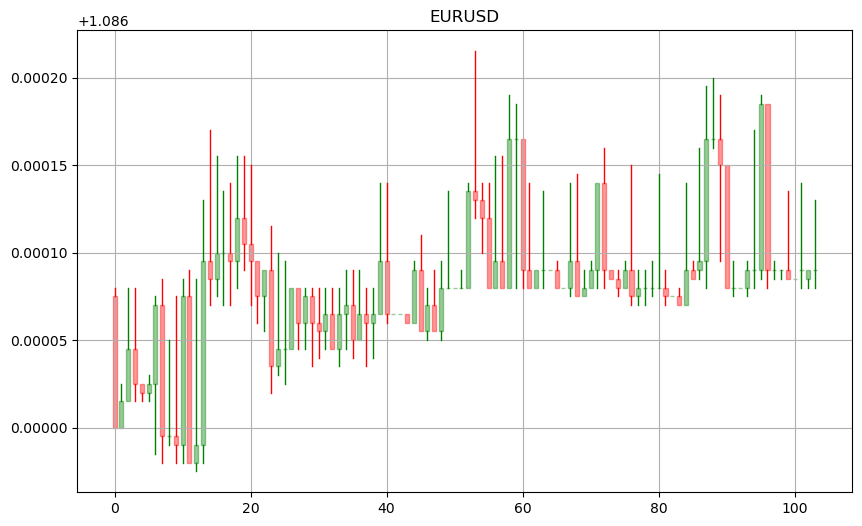

In [51]:
bars.updateEvent += onBarUpdate # activate onBarUpdate

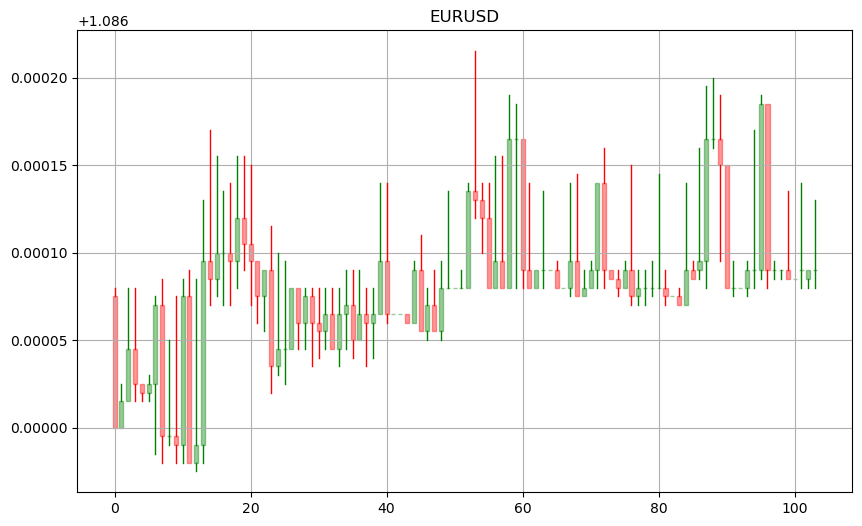

In [52]:
bars.updateEvent -= onBarUpdate # de-activate onBarUpdate

In [53]:
ib.cancelHistoricalData(bars) # cancel subscription

Error 162, reqId 13: Historical Market Data Service error message:API historical data query cancelled: 13


In [54]:
ib.disconnect()

## Preparing the Data for Day Trading

- Problem: most recent bar is (typically) incomplete (until the end of the bar has been reached)
- In Trading: Take actions once a new bar is complete 

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [ ]:
ib = IB()
ib.connect()

In [ ]:
contract = Forex('EURUSD')
contract

In [ ]:
def onBarUpdate(bars, hasNewBar):
    print(dt.datetime.utcnow())

In [ ]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [ ]:
bars.updateEvent += onBarUpdate

In [ ]:
ib.cancelHistoricalData(bars) 

In [ ]:
def onBarUpdate(bars, hasNewBar): 
    global df
    df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] # remove current bar (incomplete)
    df.set_index("date", inplace = True)
    clear_output(wait=True)
    display(df)

In [ ]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
bars.updateEvent += onBarUpdate 

In [ ]:
ib.cancelHistoricalData(bars) 

## Improving Code Efficiency

Idea: We need to run major parts of onBarUpdate only if a bar is complete (== new bar has been added)

In [ ]:
bars

In [ ]:
# check if current (incomplete) bar is more recent than the last complete bar
bars[-1].date > bars[-2].date

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    if bars[-1].date > last_bar: # if bar completed / new bar
        last_bar = bars[-1].date
    
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        clear_output(wait=True)
        display(df)

In [ ]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date # initialize last_bar
bars.updateEvent += onBarUpdate

In [ ]:
ib.cancelHistoricalData(bars) 

In [ ]:
ib.disconnect()

In [ ]:
df

In [ ]:
last_bar

## Define an SMA Day Trading Strategy

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [ ]:
ib = IB()
ib.connect()

In [ ]:
contract = Forex('EURUSD')
contract

Strategy: SMA 50/200 (minutes) Crossover (needs to be backtested!!!)

In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
def onBarUpdate(bars, hasNewBar): 
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1]
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Action
        clear_output(wait=True)
        display(df)
        

In [ ]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate 

In [ ]:
ib.cancelHistoricalData(bars) 

In [ ]:
ib.disconnect()

## Trading

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [ ]:
ib = IB()
ib.connect()

In [ ]:
# strategy parameters
sma_s = 50
sma_l = 200
freq = "1 min"
units = 1000
contract = Forex('EURUSD') # for data streaming
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD") # for trading
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
conID

__barSizeSetting__: Time period of one bar. Must be one of:
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

In [ ]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D', # must be sufficiently long!!! (200 * 1 min)
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

In [ ]:
ib.cancelHistoricalData(bars)

In [ ]:
df

In [ ]:
ib.disconnect()

## Trade Reporting

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
ib.fills()

In [ ]:
util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")

In [ ]:
util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")

In [ ]:
# strategy parameters
sma_s = 2
sma_l = 5
freq = "1 min"
units = 1000
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)

In [ ]:
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

In [ ]:
ib.cancelHistoricalData(bars) 

In [ ]:
ib.disconnect()

## Stop the Trading Session

Potential Triggers:
- stop at a certain time (e.g. 21:59 UTC time)
- stop once a certain profit/loss limit has been reached
- etc.

Required Actions:
- Stop Stream/Session
- Close Open Position (go neutral)

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
# strategy parameters
sma_s = 2
sma_l = 5
freq = "1 min"
units = 1000
end_time = dt.time(21, 59, 0) # stop condition
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
dt.datetime.utcnow().time()

In [ ]:
dt.datetime.utcnow().time() >= end_time

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [ ]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

# stop trading session
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass

## Trading other Strategies - Coding Challenge

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

__Strategy 1__: Simple Contrarian Strategy (1min / window = 1)

## Stop here if you don´t want to see the solution!

###############################################################

In [ ]:
# strategy parameters
freq = "1 min"
window = 1
units = 1000
end_time = dt.time(21, 59, 0) # stop condition
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["returns"] = np.log(df["close"] / df["close"].shift())
        df["position"] = -np.sign(df.returns.rolling(window).mean())
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [ ]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

# stop trading session
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass

__Strategy 2__: Bollinger Bands SMA 20 (minutes) / 1 Standard Deviation

## Stop here if you don´t want to see the solution!

###############################################################

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
# strategy parameters
freq = "1 min"
sma = 20
dev = 1
units = 1000
end_time = dt.time(13, 35, 0) # stop condition
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["SMA"] = df["close"].rolling(sma).mean()
        df["Lower"] = df["SMA"] - df["close"].rolling(sma).std() * dev
        df["Upper"] = df["SMA"] + df["close"].rolling(sma).std() * dev
        df["distance"] = df["close"] - df.SMA
        df["position"] = np.where(df["close"] < df.Lower, 1, np.nan)
        df["position"] = np.where(df["close"] > df.Upper, -1, df["position"])
        df["position"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position"])
        df["position"] = df.position.ffill().fillna(0)
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [ ]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

# stop trading session
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass